<a href="https://colab.research.google.com/github/gloriaypradal/Computer_Vision/blob/main/DSC680_Project1_Apple_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from bs4 import BeautifulSoup
import requests
import os
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


In [ ]:

url = "https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/"
url_req = requests.get(url).text

soup = BeautifulSoup(url_req, 'html')
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [ ]:
tables = soup.find_all( "table")
data = tables[0].tbody.find_all('tr')
df_data = [[td.getText().strip() for td in tr.find_all('td')] for tr in data]
df_data

[['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'Annual',
  'Percent Change'],
 ['Year',
  'Jan',
  'Feb',
  'Mar',
  'Apr',
  'May',
  'June',
  'July',
  'Aug',
  'Sep',
  'Oct',
  'Nov',
  'Dec',
  'Avg',
  'Dec-Dec',
  'Avg-Avg'],
 ['1913',
  '9.8',
  '9.8',
  '9.8',
  '9.8',
  '9.7',
  '9.8',
  '9.9',
  '9.9',
  '10.0',
  '10.0',
  '10.1',
  '10.0',
  '9.9',
  '–',
  '–'],
 ['1914',
  '10.0',
  '9.9',
  '9.9',
  '9.8',
  '9.9',
  '9.9',
  '10.0',
  '10.2',
  '10.2',
  '10.1',
  '10.2',
  '10.1',
  '10.0',
  '1.0',
  '1.0'],
 ['1915',
  '10.1',
  '10.0',
  '9.9',
  '10.0',
  '10.1',
  '10.1',
  '10.1',
  '10.1',
  '10.1',
  '10.2',
  '10.3',
  '10.3',
  '10.1',
  '2.0',
  '1.0'],
 ['1916',
  '10.4',
  '10.4',
  '10.5',
  '10.6',
  '10.7',
  '10.8',
  '10.8',
  '10.9',
  '11.1',
  '11.3',
  '11.5',
  '11.6',
  '10.9',
  '12.6',
  '7.9'],
 ['1917',
  '11.7',
  '12.0',
  '12.0',
  '12.6',
  '12.8',
  '13.0',
  '12.8',
  '13.0',
  '13.3',
  '13.5',
  '13

In [ ]:
df1 = pd.DataFrame(df_data, columns = df_data[1:2])
df1 = df1.drop([0,1])
df1.head()

,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Avg,Dec-Dec,Avg-Avg
2,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,9.9,–,–
3,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,10.0,1.0,1.0
4,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,10.1,2.0,1.0
5,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,10.9,12.6,7.9
6,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,12.8,18.1,17.4


In [ ]:
df1.dtypes

Year         int64
Jan        float64
Feb        float64
Mar        float64
Apr        float64
May        float64
June       float64
July       float64
Aug        float64
Sep        float64
Oct        float64
Nov        float64
Dec        float64
Avg        float64
Dec-Dec     object
Avg-Avg     object
dtype: object

TypeError: ignored

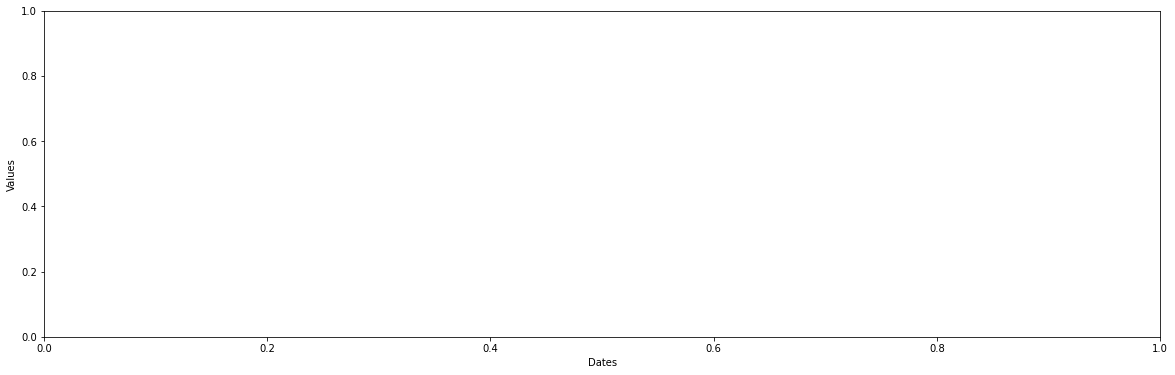

In [ ]:
plt.figure(figsize=(20,6))
plt.grid(False)
plt.xlabel('Dates')
plt.ylabel('Values')
plt.plot(df1["Avg-Avg"], df1["Year"])
plt.title('Apple closing price')
plt.show()

In [ ]:
df_apple = pd.read_csv("AAPL_processed1.csv")
df_apple['Date'] = pd.to_datetime(df_apple['Date'])
df_apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600


In [ ]:
df_apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,1.021800e+04
mean,11.300340,11.421450,11.175662,11.302658,10.725626,3.367509e+08
std,23.212108,23.473441,22.936529,23.214144,22.898992,3.408031e+08
min,0.049665,0.049665,0.049107,0.049107,0.038548,0.000000e+00
25%,0.276786,0.283281,0.267857,0.275402,0.232184,1.286682e+08
50%,0.450893,0.459910,0.443214,0.450893,0.375689,2.246118e+08
75%,12.342054,12.426607,12.266339,12.356964,10.625787,4.189094e+08
max,143.600006,145.089996,141.369995,143.160004,142.704010,7.421641e+09


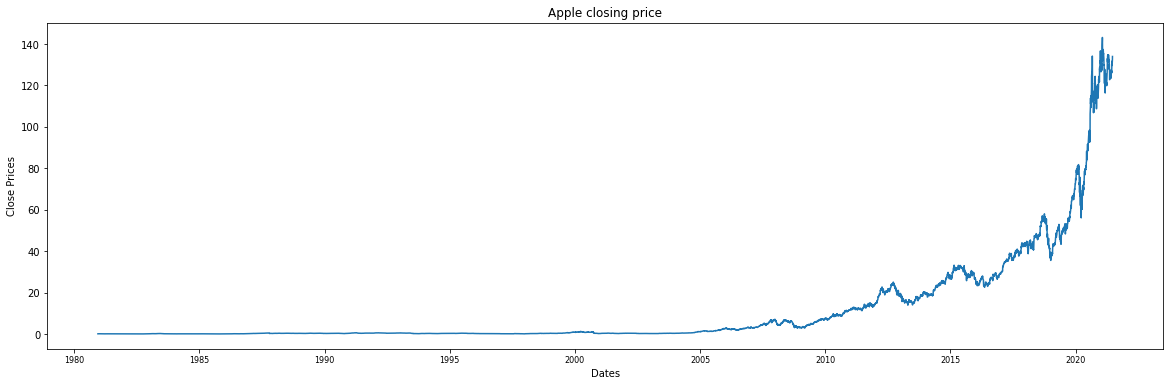

In [ ]:
plt.figure(figsize=(20,6))
plt.grid(False)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df_apple["Date" ],df_apple['Close'])
plt.title('Apple closing price')
plt.xticks(fontsize= 8)
plt.show()

In [ ]:
df_closing_apple = df_apple['Close']

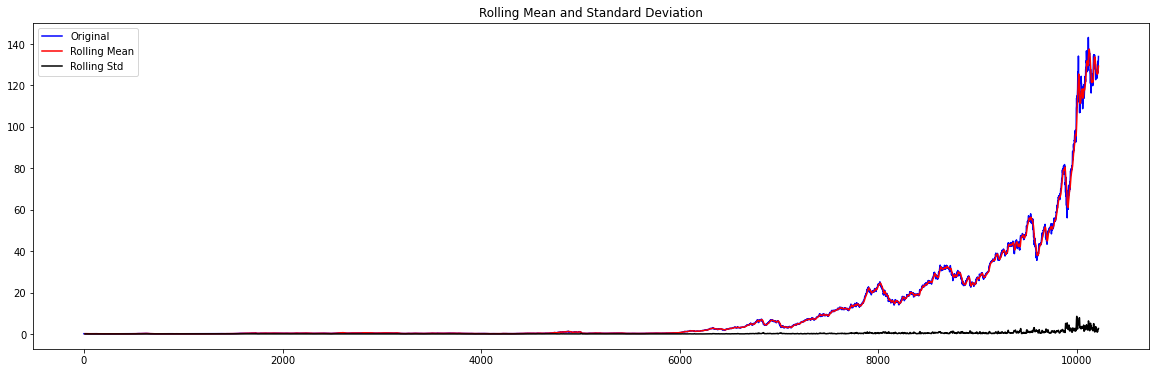

Results of dickey fuller test
Test Statistics                    5.417971
p-value                            1.000000
No. of lags used                  39.000000
Number of observations used    10178.000000
critical value (1%)               -3.430993
critical value (5%)               -2.861824
critical value (10%)              -2.566921
dtype: float64


In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.figure(figsize=(20,6))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
   
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_closing_apple)

In [ ]:
# reading google
df_google = pd.read_csv("GOOG_processed1.csv")
df_google['Date'] = pd.to_datetime(df_google['Date'])
df_google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [ ]:
def plotting_1(data, title):
  plt.figure(figsize=(20,6))
  plt.grid(False)
  plt.xlabel('Dates')
  plt.ylabel('Close Prices')
  plt.plot(data["Date" ],data['Close'])
  plt.title(title)
  plt.show()

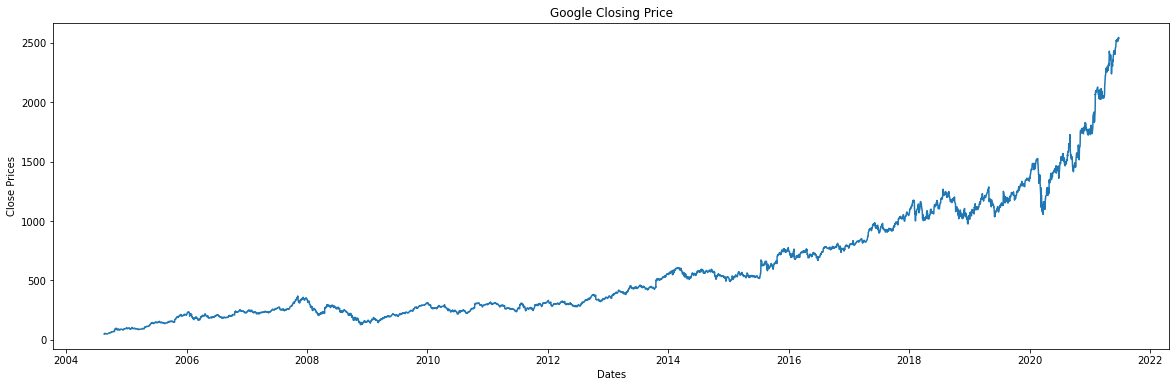

In [ ]:
plotting_1(df_google, "Google Closing Price")

In [ ]:
df_closing_google = df_google["Close"]

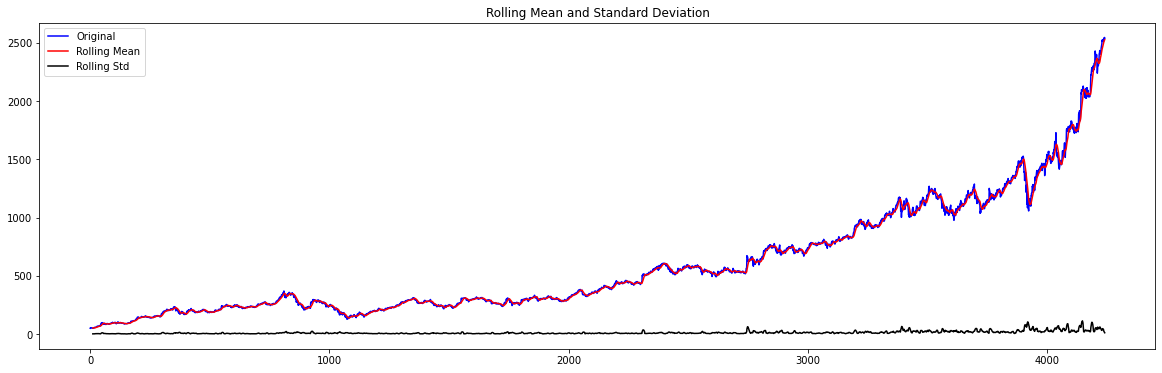

Results of dickey fuller test
Test Statistics                   4.423959
p-value                           1.000000
No. of lags used                 31.000000
Number of observations used    4211.000000
critical value (1%)              -3.431904
critical value (5%)              -2.862227
critical value (10%)             -2.567135
dtype: float64


In [ ]:
test_stationarity(df_closing_google)

In [ ]:
df_disney = pd.read_csv("DIS.csv")
df_disney.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.092908,0.096026,0.092908,0.092908,0.058398,841958
1,1962-01-03,0.092908,0.094467,0.092908,0.094155,0.059182,801865
2,1962-01-04,0.094155,0.094467,0.093532,0.094155,0.059182,962238
3,1962-01-05,0.094155,0.094779,0.093844,0.094467,0.059378,962238
4,1962-01-08,0.094467,0.095714,0.092285,0.094155,0.059182,1282984


In [ ]:
df_disney['Date'] = pd.to_datetime(df_disney['Date'])

In [ ]:
df_disney.to_csv("DIS_processed1.csv")

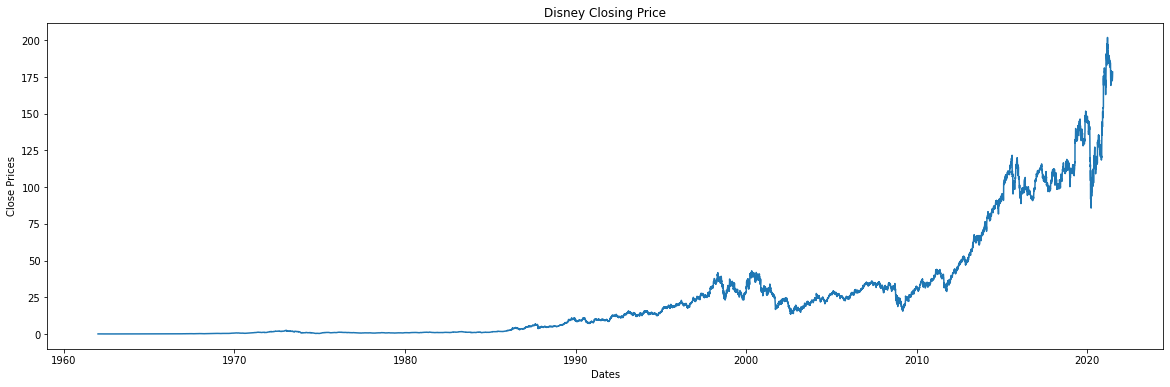

In [ ]:
plotting_1(df_disney, "Disney Closing Price")

In [ ]:
df_closing_disney = df_disney["Close"]

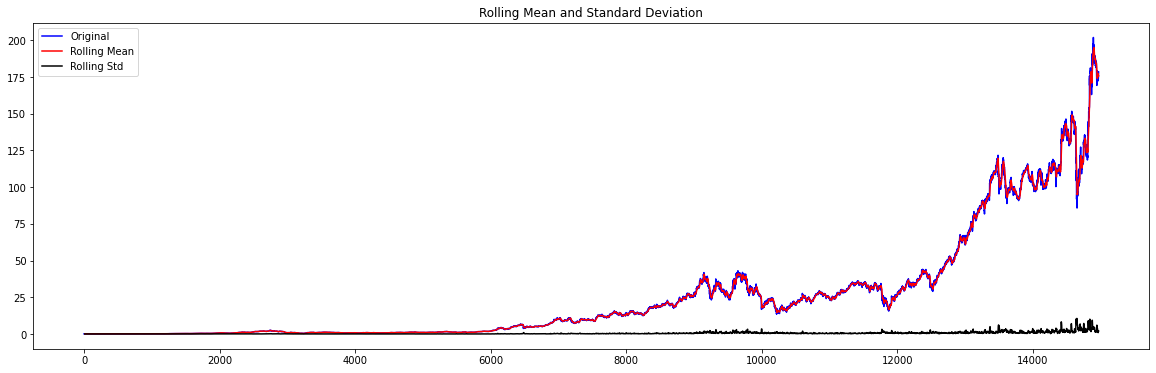

Results of dickey fuller test
Test Statistics                    2.010584
p-value                            0.998687
No. of lags used                  42.000000
Number of observations used    14931.000000
critical value (1%)               -3.430788
critical value (5%)               -2.861734
critical value (10%)              -2.566873
dtype: float64


In [ ]:
test_stationarity(df_closing_disney)

In [ ]:
df_microsoft = pd.read_csv("MSFT.csv")
df_microsoft.head()
print(df_microsoft.describe())
print(df_microsoft.isnull().sum())
df_microsoft['Date'] = pd.to_datetime(df_microsoft['Date'])
df_microsoft.to_csv("MSFT_processed1.csv")

              Open         High  ...    Adj Close        Volume
count  8895.000000  8895.000000  ...  8895.000000  8.895000e+03
mean     35.759181    36.143955  ...    30.766995  5.938352e+07
std      46.194483    46.656073  ...    46.327213  3.856866e+07
min       0.088542     0.092014  ...     0.057208  2.304000e+06
25%       3.871094     3.916016  ...     2.453063  3.540120e+07
50%      26.625000    26.910000  ...    18.731800  5.260230e+07
75%      37.245001    37.599998  ...    27.498417  7.327175e+07
max     266.230011   267.850006  ...   266.690002  1.031789e+09

[8 rows x 6 columns]
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


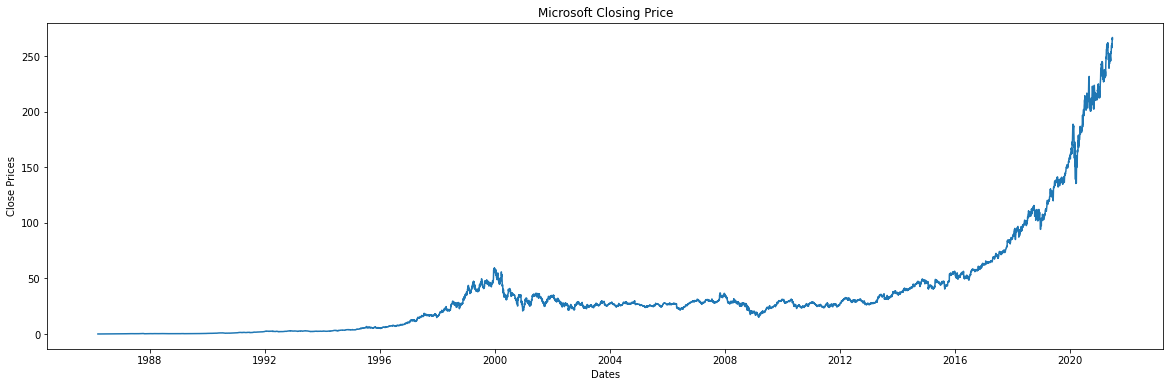

In [ ]:
plotting_1(df_microsoft, "Microsoft Closing Price")

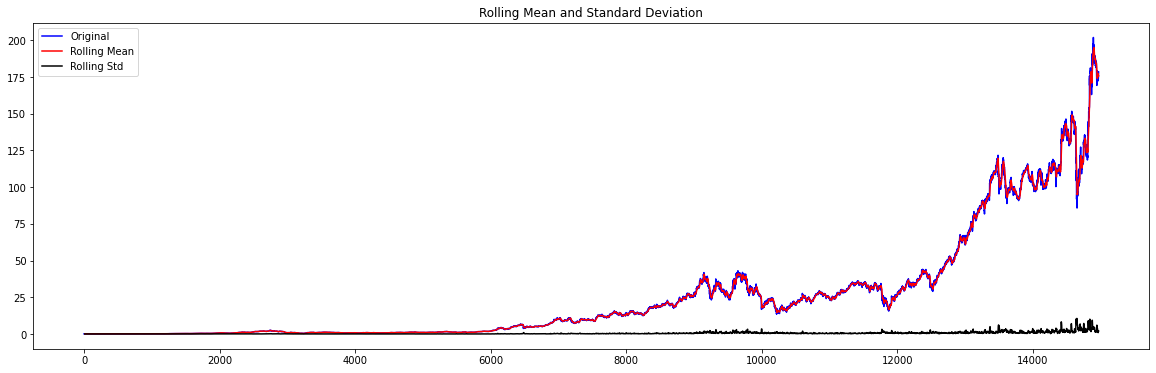

Results of dickey fuller test
Test Statistics                    2.010584
p-value                            0.998687
No. of lags used                  42.000000
Number of observations used    14931.000000
critical value (1%)               -3.430788
critical value (5%)               -2.861734
critical value (10%)              -2.566873
dtype: float64


In [ ]:
df_closing_microsoft = df_microsoft["Close"]
test_stationarity(df_closing_disney)

In [ ]:
df_dell = pd.read_csv("DELL.csv")
df_dell.head()
print(df_dell.describe())
print(df_dell.isnull().sum())
df_dell['Date'] = pd.to_datetime(df_dell['Date'])
df_dell.to_csv("DELL_processed1.csv")

              Open         High  ...    Adj Close        Volume
count  1223.000000  1223.000000  ...  1223.000000  1.223000e+03
mean     51.356399    51.977937  ...    51.373585  3.024094e+06
std      17.023809    17.164241  ...    17.029302  3.781666e+06
min      23.643412    24.086378  ...    23.671097  1.132360e+05
25%      39.700996    40.517719  ...    39.742525  1.636024e+06
50%      49.500000    50.080002  ...    49.459999  2.295800e+06
75%      58.120155    58.687708  ...    57.898672  3.213046e+06
max     104.209999   104.620003  ...   103.980003  7.496562e+07

[8 rows x 6 columns]
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


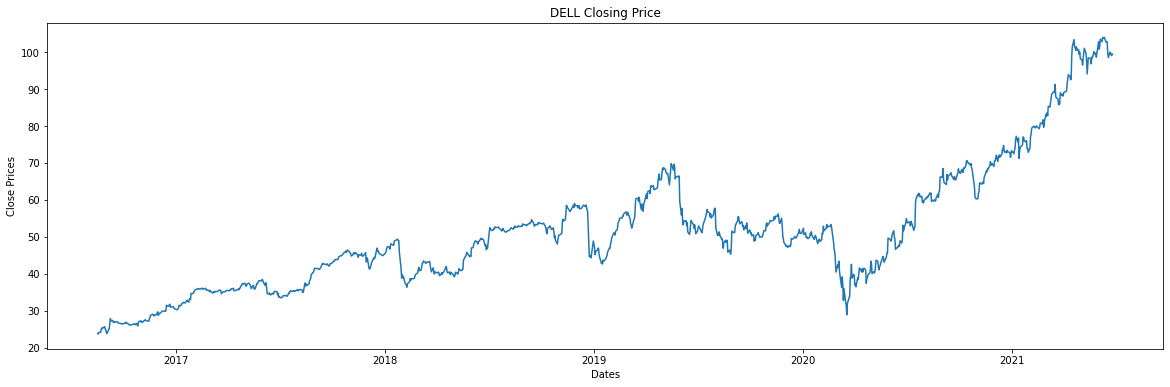

In [ ]:
plotting_1(df_dell, "DELL Closing Price")

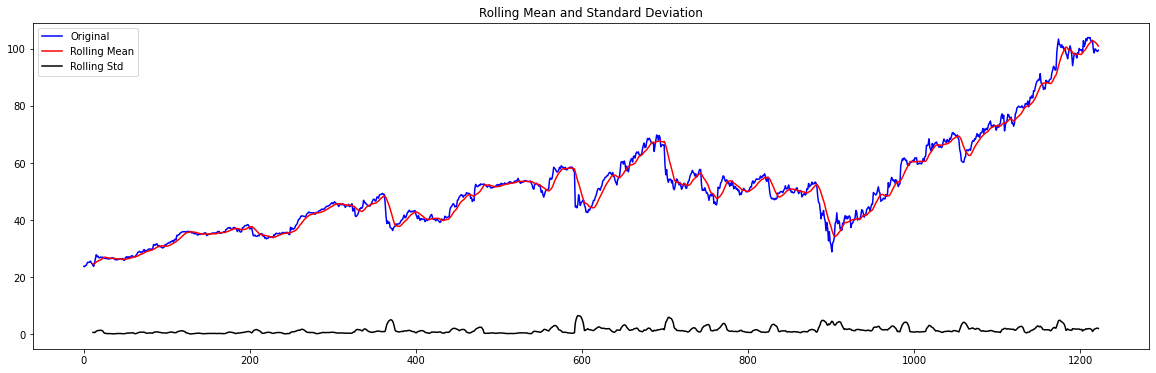

Results of dickey fuller test
Test Statistics                  -0.219535
p-value                           0.936153
No. of lags used                  2.000000
Number of observations used    1220.000000
critical value (1%)              -3.435721
critical value (5%)              -2.863912
critical value (10%)             -2.568033
dtype: float64


In [ ]:
df_closing_dell = df_dell["Close"]
test_stationarity(df_closing_dell)

In [ ]:
df_gold = pd.read_csv("GC=F.csv")
df_gold.head()
print(df_gold.describe())
print(df_gold.isnull().sum())
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold.to_csv("GOLD_processed1.csv")

              Open         High  ...    Adj Close         Volume
count  5191.000000  5191.000000  ...  5191.000000    5191.000000
mean   1016.579002  1021.716298  ...  1016.435947    4268.031978
std     489.309009   492.272125  ...   489.164715   24568.524415
min     255.000000   256.100006  ...   255.100006       0.000000
25%     477.149994   478.399994  ...   477.699997      17.000000
50%    1172.699951  1177.800049  ...  1172.599976      94.000000
75%    1333.149964  1340.450012  ...  1333.400024     357.500000
max    2045.500000  2063.000000  ...  2051.500000  386334.000000

[8 rows x 6 columns]
Date           0
Open         112
High         112
Low          112
Close        112
Adj Close    112
Volume       112
dtype: int64


In [ ]:
df_gold.shape

(5303, 7)

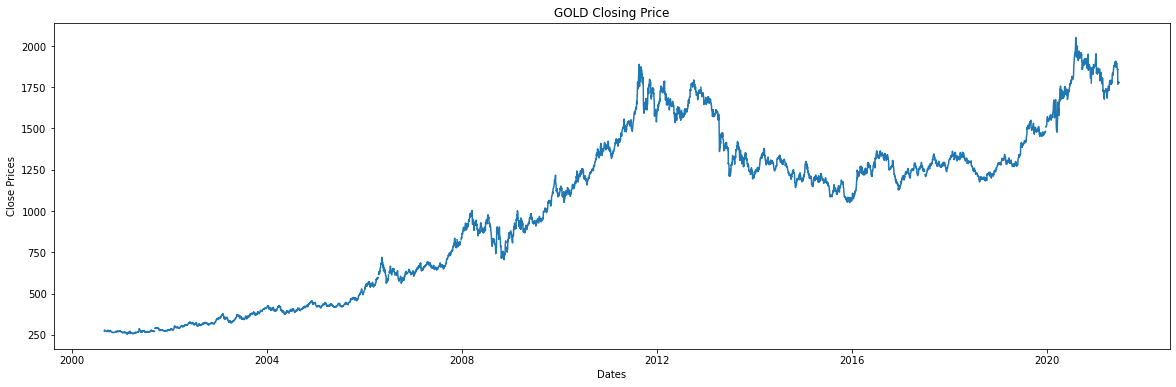

In [ ]:
plotting_1(df_gold, "GOLD Closing Price")

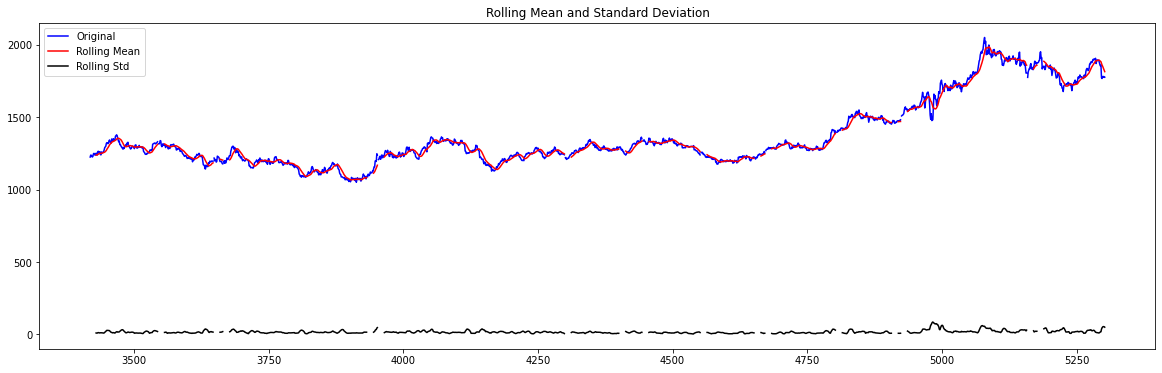

Results of dickey fuller test


MissingDataError: ignored

In [ ]:
df_closing_gold = df_gold["Close"]
test_stationarity(df_closing_gold)

In [ ]:
df_samsung = pd.read_csv("005930.KS.csv")
df_samsung.head()
print(df_samsung.describe())
print(df_samsung.isnull().sum())
df_samsung['Date'] = pd.to_datetime(df_samsung['Date'])
df_samsung.to_csv("SAMSUNG_processed1.csv")

               Open          High  ...     Adj Close        Volume
count   5394.000000   5394.000000  ...   5394.000000  5.394000e+03
mean   22855.333704  23097.565814  ...  19976.255426  2.207162e+07
std    17814.624512  17984.763802  ...  17412.698160  1.563503e+07
min     2540.000000   2760.000000  ...   2117.926025  0.000000e+00
25%     9892.500000  10000.000000  ...   7728.877808  1.185518e+07
50%    15800.000000  15940.000000  ...  12825.604492  1.803800e+07
75%    29320.000000  29580.000000  ...  24583.120117  2.770875e+07
max    90300.000000  96800.000000  ...  90597.414063  1.642150e+08

[8 rows x 6 columns]
Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64


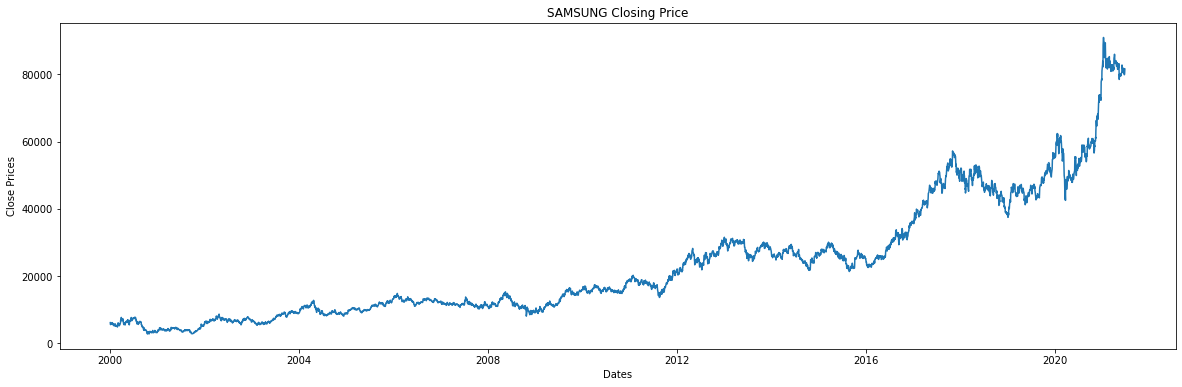

In [ ]:
plotting_1(df_samsung, "SAMSUNG Closing Price")

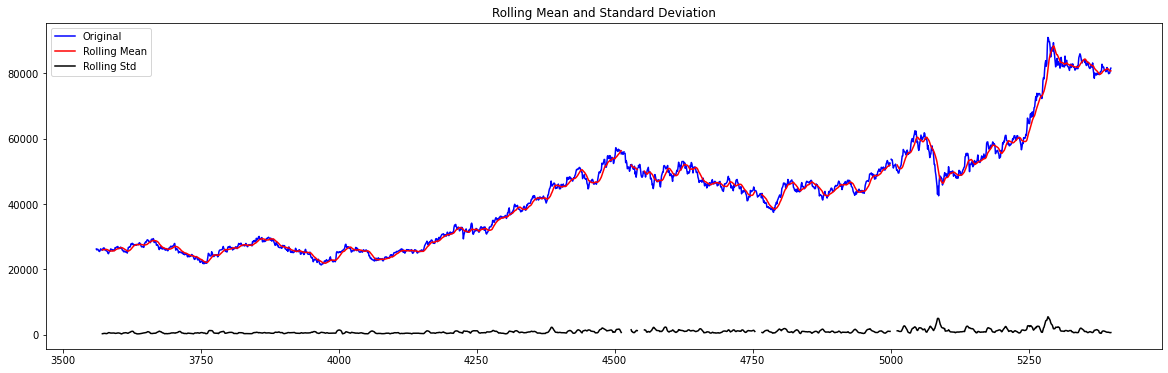

Results of dickey fuller test


MissingDataError: ignored

In [ ]:
df_closing_samsung = df_samsung["Close"]
test_stationarity(df_closing_samsung)

In [ ]:
# subsetting data sets to match data available for all the companies in the study
def sub_data(data):
  year1 = []
  a = 0
  for a in range(len(data)):
    year1.append(data.Date[a].year)
    a = a + 1
  data["year"] = year1
  data_f = data[data["year"] > 2013]
  return data_f

In [ ]:
df_google = sub_data(df_google)
df_disney = sub_data(df_disney)
df_gold = sub_data(df_gold)
df_microsoft = sub_data(df_microsoft)
df_apple = sub_data(df_apple)


In [ ]:
df_samsung = sub_data(df_samsung)

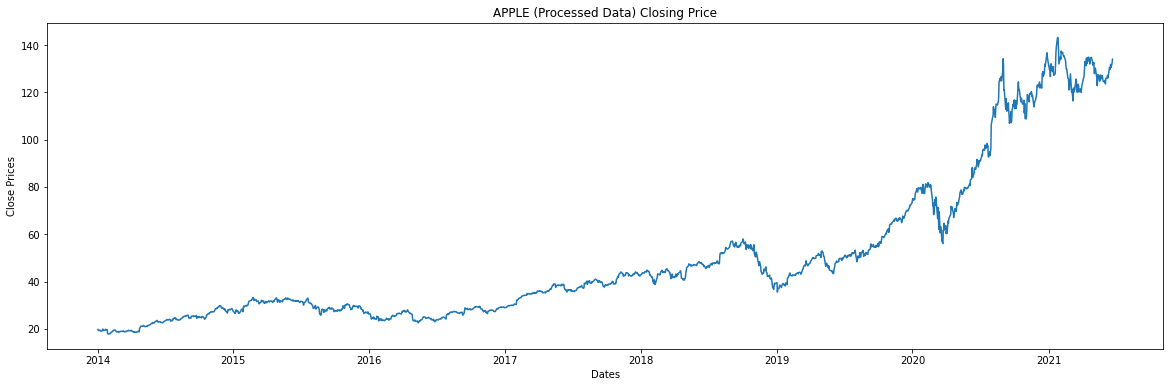

In [ ]:
plotting_1(df_apple, "APPLE (Processed Data) Closing Price")

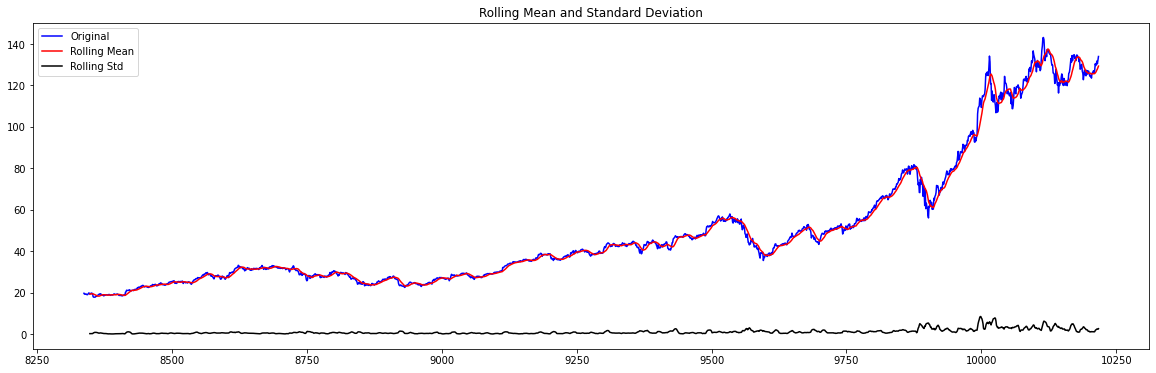

Results of dickey fuller test
Test Statistics                   1.256536
p-value                           0.996354
No. of lags used                 24.000000
Number of observations used    1856.000000
critical value (1%)              -3.433878
critical value (5%)              -2.863099
critical value (10%)             -2.567600
dtype: float64


In [ ]:
df_closing_apple = df_apple["Close"]
test_stationarity(df_closing_apple)

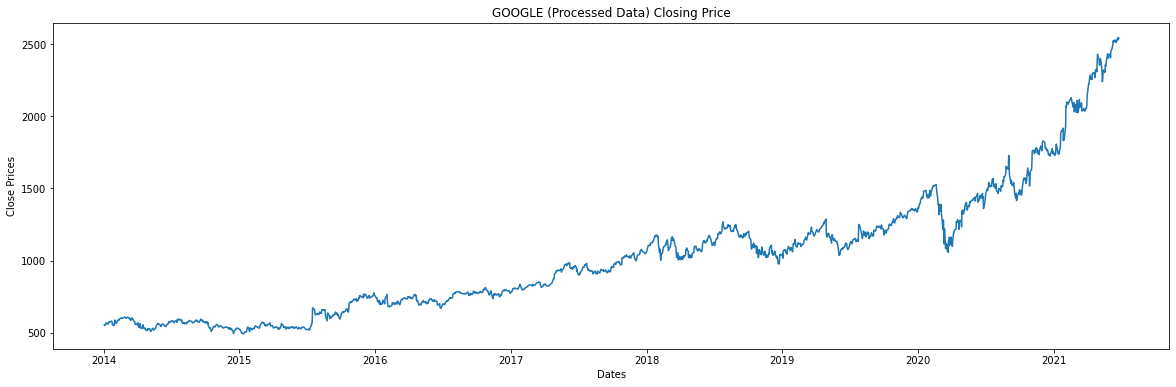

In [ ]:
plotting_1(df_google, "GOOGLE (Processed Data) Closing Price")

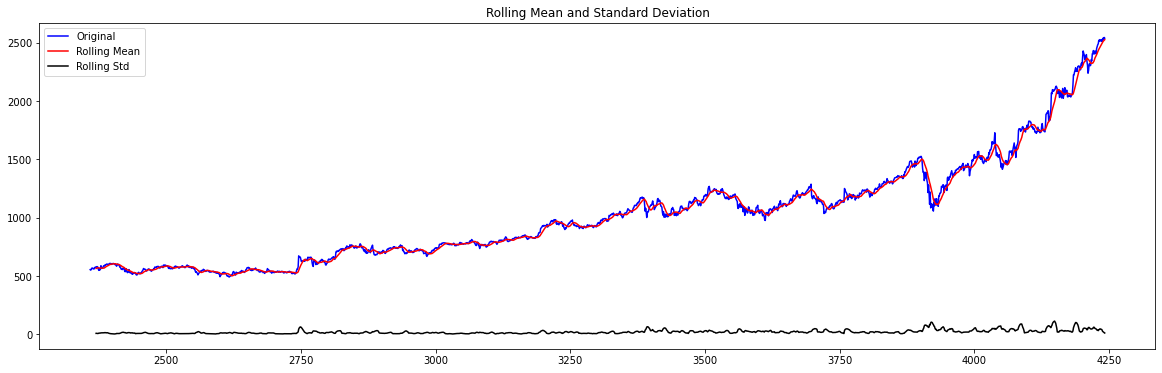

Results of dickey fuller test
Test Statistics                   2.917847
p-value                           1.000000
No. of lags used                 26.000000
Number of observations used    1857.000000
critical value (1%)              -3.433876
critical value (5%)              -2.863098
critical value (10%)             -2.567599
dtype: float64


In [ ]:
df_closing_google = df_google["Close"]
test_stationarity(df_closing_google)

<Figure size 432x288 with 0 Axes>

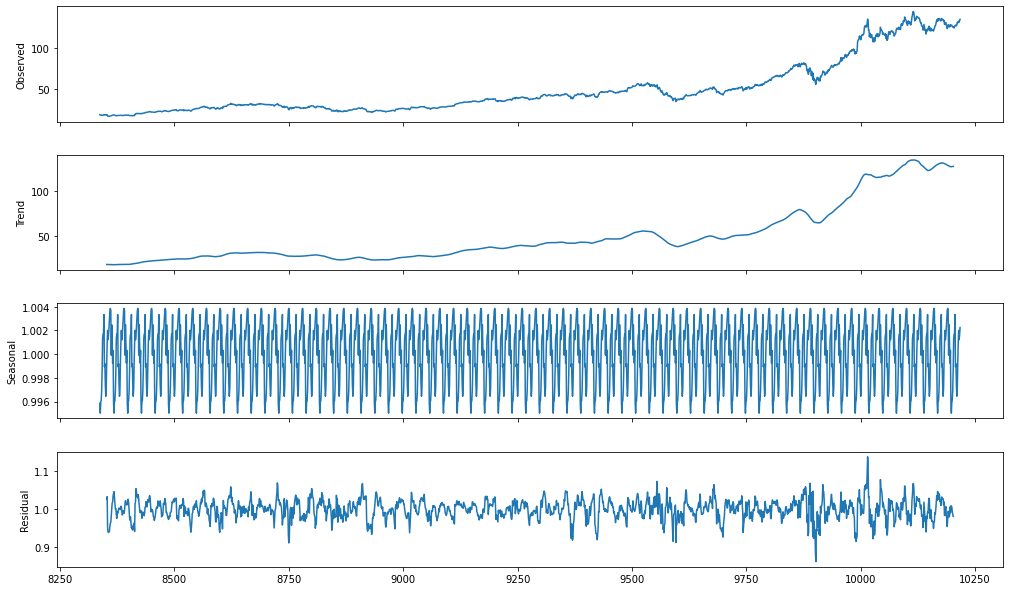

In [ ]:
result = seasonal_decompose(df_closing_apple, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [ ]:
df_oil = pd.read_csv("Macrotrends-crude-oil-prices-daily.csv")
df_oil.head()

,Date,Closing Value
0,1/2/1986,25.56
1,1/3/1986,26.00
2,1/6/1986,26.53
3,1/7/1986,25.85
4,1/8/1986,25.87


In [ ]:
df_oil.shape
df_oil.columns = ['Date', 'Close']
print(df_oil.describe())
print(df_oil.isnull().sum())
df_oil['Date'] = pd.to_datetime(df_oil['Date'])
df_oil.to_csv("OIL_processed1.csv")

             Close
count  8932.000000
mean     44.241742
std      28.740187
min      10.250000
25%      19.840000
50%      32.465000
75%      62.972500
max     145.310000
Date     0
Close    0
dtype: int64


In [ ]:
df_oil = sub_data(df_oil)

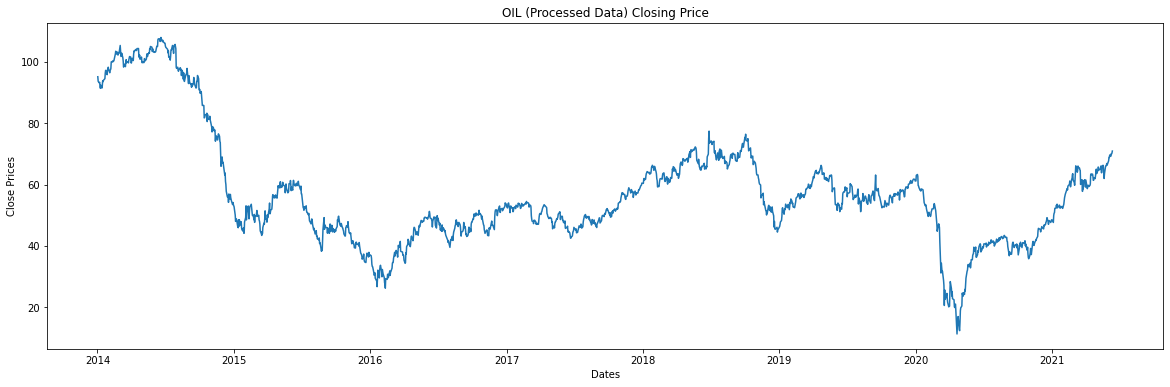

In [ ]:
plotting_1(df_oil, "OIL (Processed Data) Closing Price")

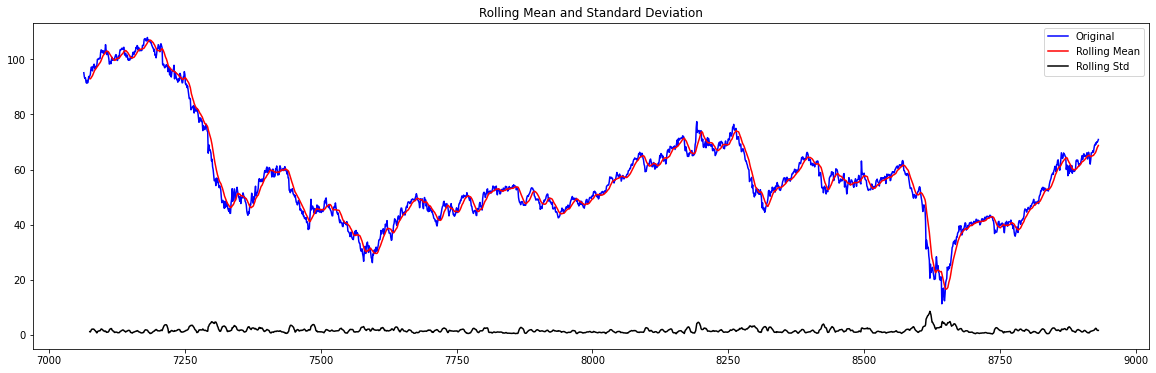

Results of dickey fuller test
Test Statistics                  -2.269789
p-value                           0.181897
No. of lags used                  9.000000
Number of observations used    1858.000000
critical value (1%)              -3.433874
critical value (5%)              -2.863097
critical value (10%)             -2.567599
dtype: float64


In [ ]:
df_closing_oil = df_oil["Close"]
test_stationarity(df_closing_oil)

In [ ]:
df_apple.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'year'], dtype='object')

In [ ]:
df_apple = df_apple.drop(['Open', 'High', 'Low','Adj Close', 'Volume'], axis = 1)

In [ ]:
df_google = df_google.drop(['Open', 'High', 'Low','Adj Close', 'Volume', 'year'], axis = 1)
df_disney = df_disney.drop(['Open', 'High', 'Low','Adj Close', 'Volume', 'year'], axis = 1)
df_gold = df_gold.drop(['Open', 'High', 'Low','Adj Close', 'Volume', 'year'], axis = 1)
df_microsoft = df_microsoft.drop(['Open', 'High', 'Low','Adj Close', 'Volume', 'year'], axis = 1)
df_samsung = df_samsung.drop(['Open', 'High', 'Low','Adj Close', 'Volume', 'year'], axis = 1)

In [ ]:
df_dell = df_dell.drop(['Open', 'High', 'Low','Adj Close', 'Volume'], axis = 1)

In [ ]:
df_dell.columns = ["Date", "Close_dell"]

In [ ]:
df_apple.columns = ["Date", "Close_apple", "Year"]

In [ ]:
df_oil = df_oil.drop(['year'], axis = 1)

In [ ]:
df_google.columns = ["Date", "Close_google"]
df_disney.columns = ["Date", "Close_disney"]
df_gold.columns = ["Date", "Close_gold"]
df_microsoft.columns = ["Date", "Close_microsoft"]
df_samsung.columns = ["Date", "Close_samsung"]
df_oil.columns = ["Date", "Close_Oil"]

In [ ]:
df_f1 = pd.merge(df_apple, df_google, how ="outer", on = "Date")

In [ ]:
df_f1.head()

,Date,Close_apple,Year,Close_google
0,2014-01-02,19.754642,2014.0,554.481689
1,2014-01-03,19.320715,2014.0,550.436829
2,2014-01-06,19.426071,2014.0,556.573853
3,2014-01-07,19.287144,2014.0,567.303589
4,2014-01-08,19.409286,2014.0,568.484192


In [ ]:
df_f = pd.merge(df_f1, df_disney, how = "outer", on = "Date")

In [ ]:
first_column = df_f.pop('Year')

df_f.insert(0, 'Year', first_column)

In [ ]:
df_f = pd.merge(df_f, df_dell, how = "outer", on = "Date")

In [ ]:
df_f = pd.merge(df_f, df_microsoft, how = "outer", on="Date")

In [ ]:
df_f = pd.merge(df_f, df_samsung, how = "outer", on="Date")

In [ ]:
df_f = pd.merge(df_f, df_oil, how = "outer", on="Date")

In [ ]:
df_f = pd.merge(df_f, df_gold, how = "outer", on="Date")

In [ ]:
df_f.head()

,Year,Date,Close_apple,Close_google,Close_disney,Close_dell,Close_microsoft,Close_samsung,Close_Oil,Close_gold
0,2014.0,2014-01-02,19.754642,554.481689,76.269997,NaN,37.160000,26180.0,95.14,1225.000000
1,2014.0,2014-01-03,19.320715,550.436829,76.110001,NaN,36.910000,25920.0,93.66,1238.400024
2,2014.0,2014-01-06,19.426071,556.573853,75.820000,NaN,36.130001,26140.0,93.12,1237.800049
3,2014.0,2014-01-07,19.287144,567.303589,76.339996,NaN,36.410000,26080.0,93.31,1229.400024
4,2014.0,2014-01-08,19.409286,568.484192,75.220001,NaN,35.759998,25820.0,91.90,1225.300049


In [ ]:
df_f.isnull().sum()

Year                58
Date                 0
Close_apple         58
Close_google        55
Close_disney        55
Close_dell         716
Close_microsoft     55
Close_samsung      105
Close_Oil           71
Close_gold          71
dtype: int64

In [ ]:
df_f.drop(columns = ["Close_dell"], inplace=True)

In [ ]:
df_f.isnull().sum()

Year                58
Date                 0
Close_apple         58
Close_google        55
Close_disney        55
Close_microsoft     55
Close_samsung      105
Close_Oil           71
Close_gold          71
dtype: int64

In [ ]:
year1 = []
a = 0
for a in range(len(df_f)):
  year1.append(df_f.Date[a].year)
  a = a + 1


1939

In [ ]:
df_f["Year"] = year1

In [ ]:
df_final = df_f.bfill().ffill()


In [ ]:
df_final.isnull().sum()

Year               0
Date               0
Close_apple        0
Close_google       0
Close_disney       0
Close_microsoft    0
Close_samsung      0
Close_Oil          0
Close_gold         0
dtype: int64

IndexError: ignored

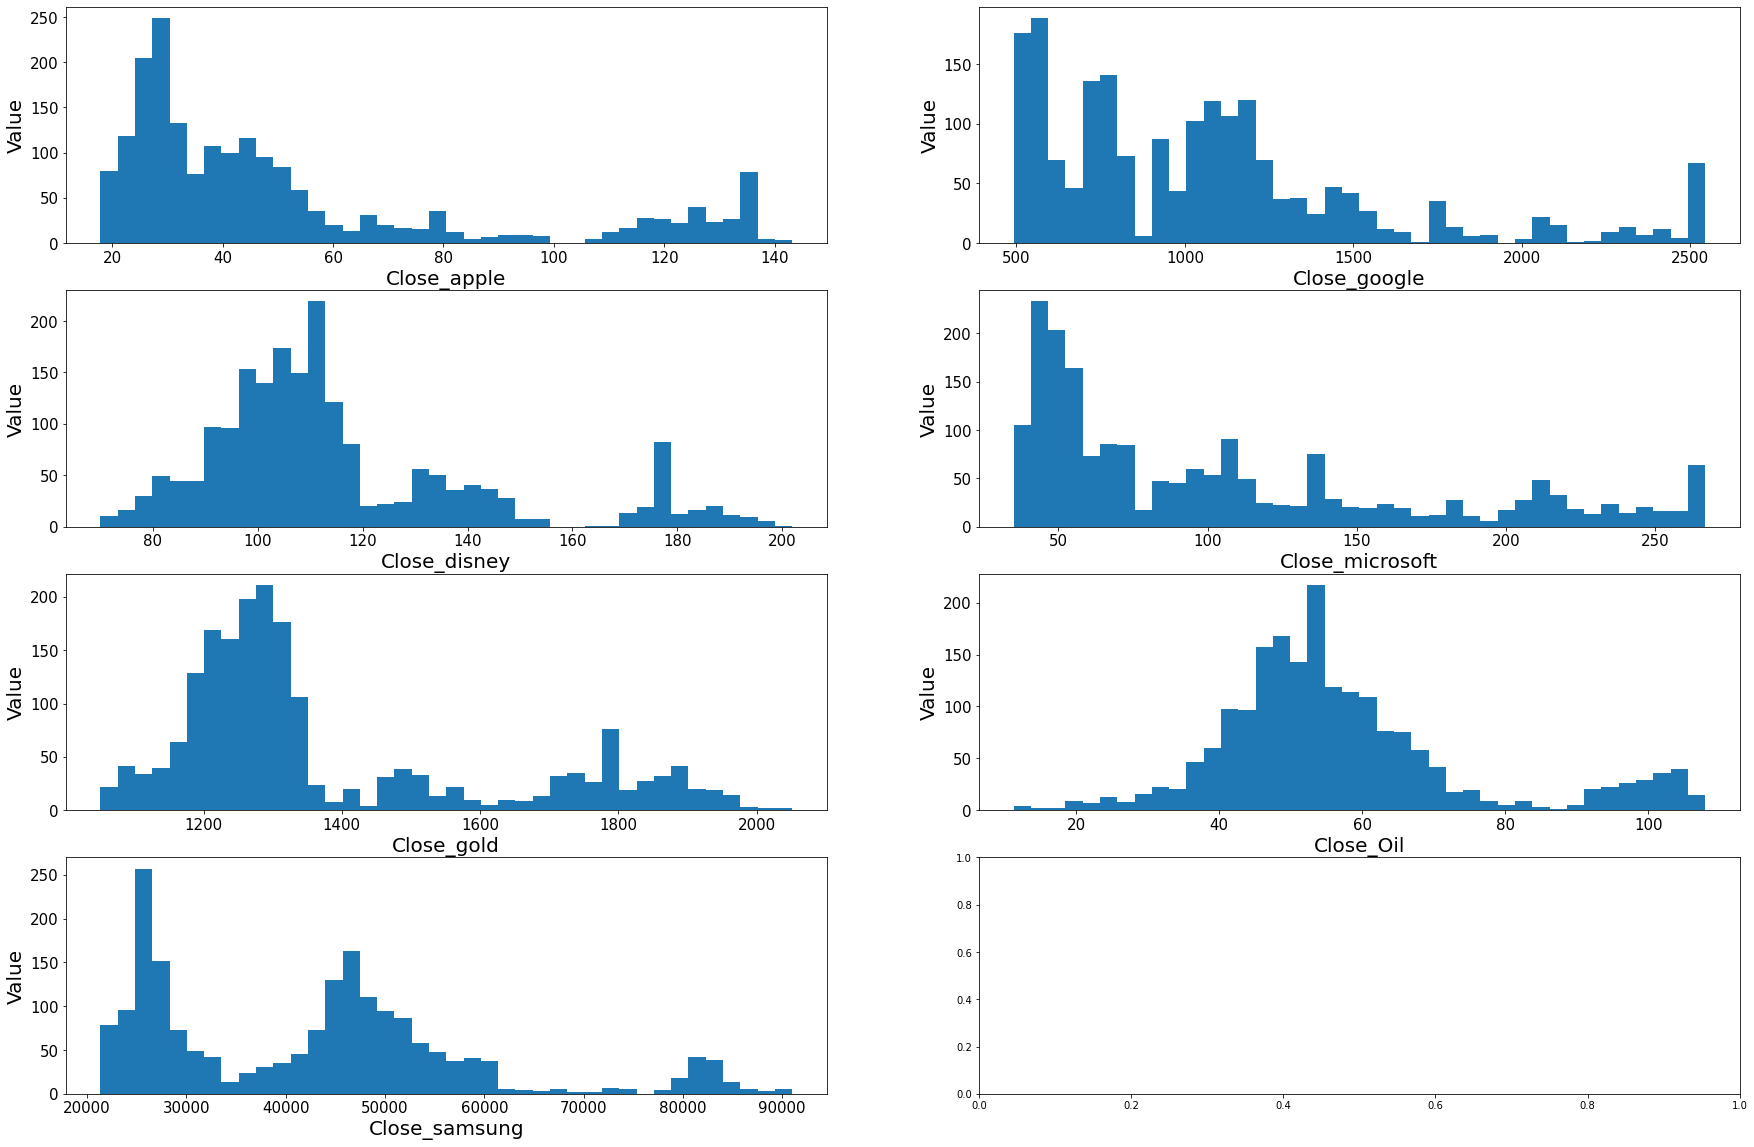

In [ ]:

plt.rcParams['figure.figsize'] = (30, 20)

fig, axes = plt.subplots(nrows = 4, ncols = 2)

# Specify the features of interest
num_features = ['Close_apple', 'Close_google', 'Close_disney', 'Close_microsoft', 'Close_gold', 'Close_Oil', 'Close_samsung']
xaxes = num_features
yaxes = ['Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value']


# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df_final[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

plt.show()

In [ ]:
import seaborn as sns

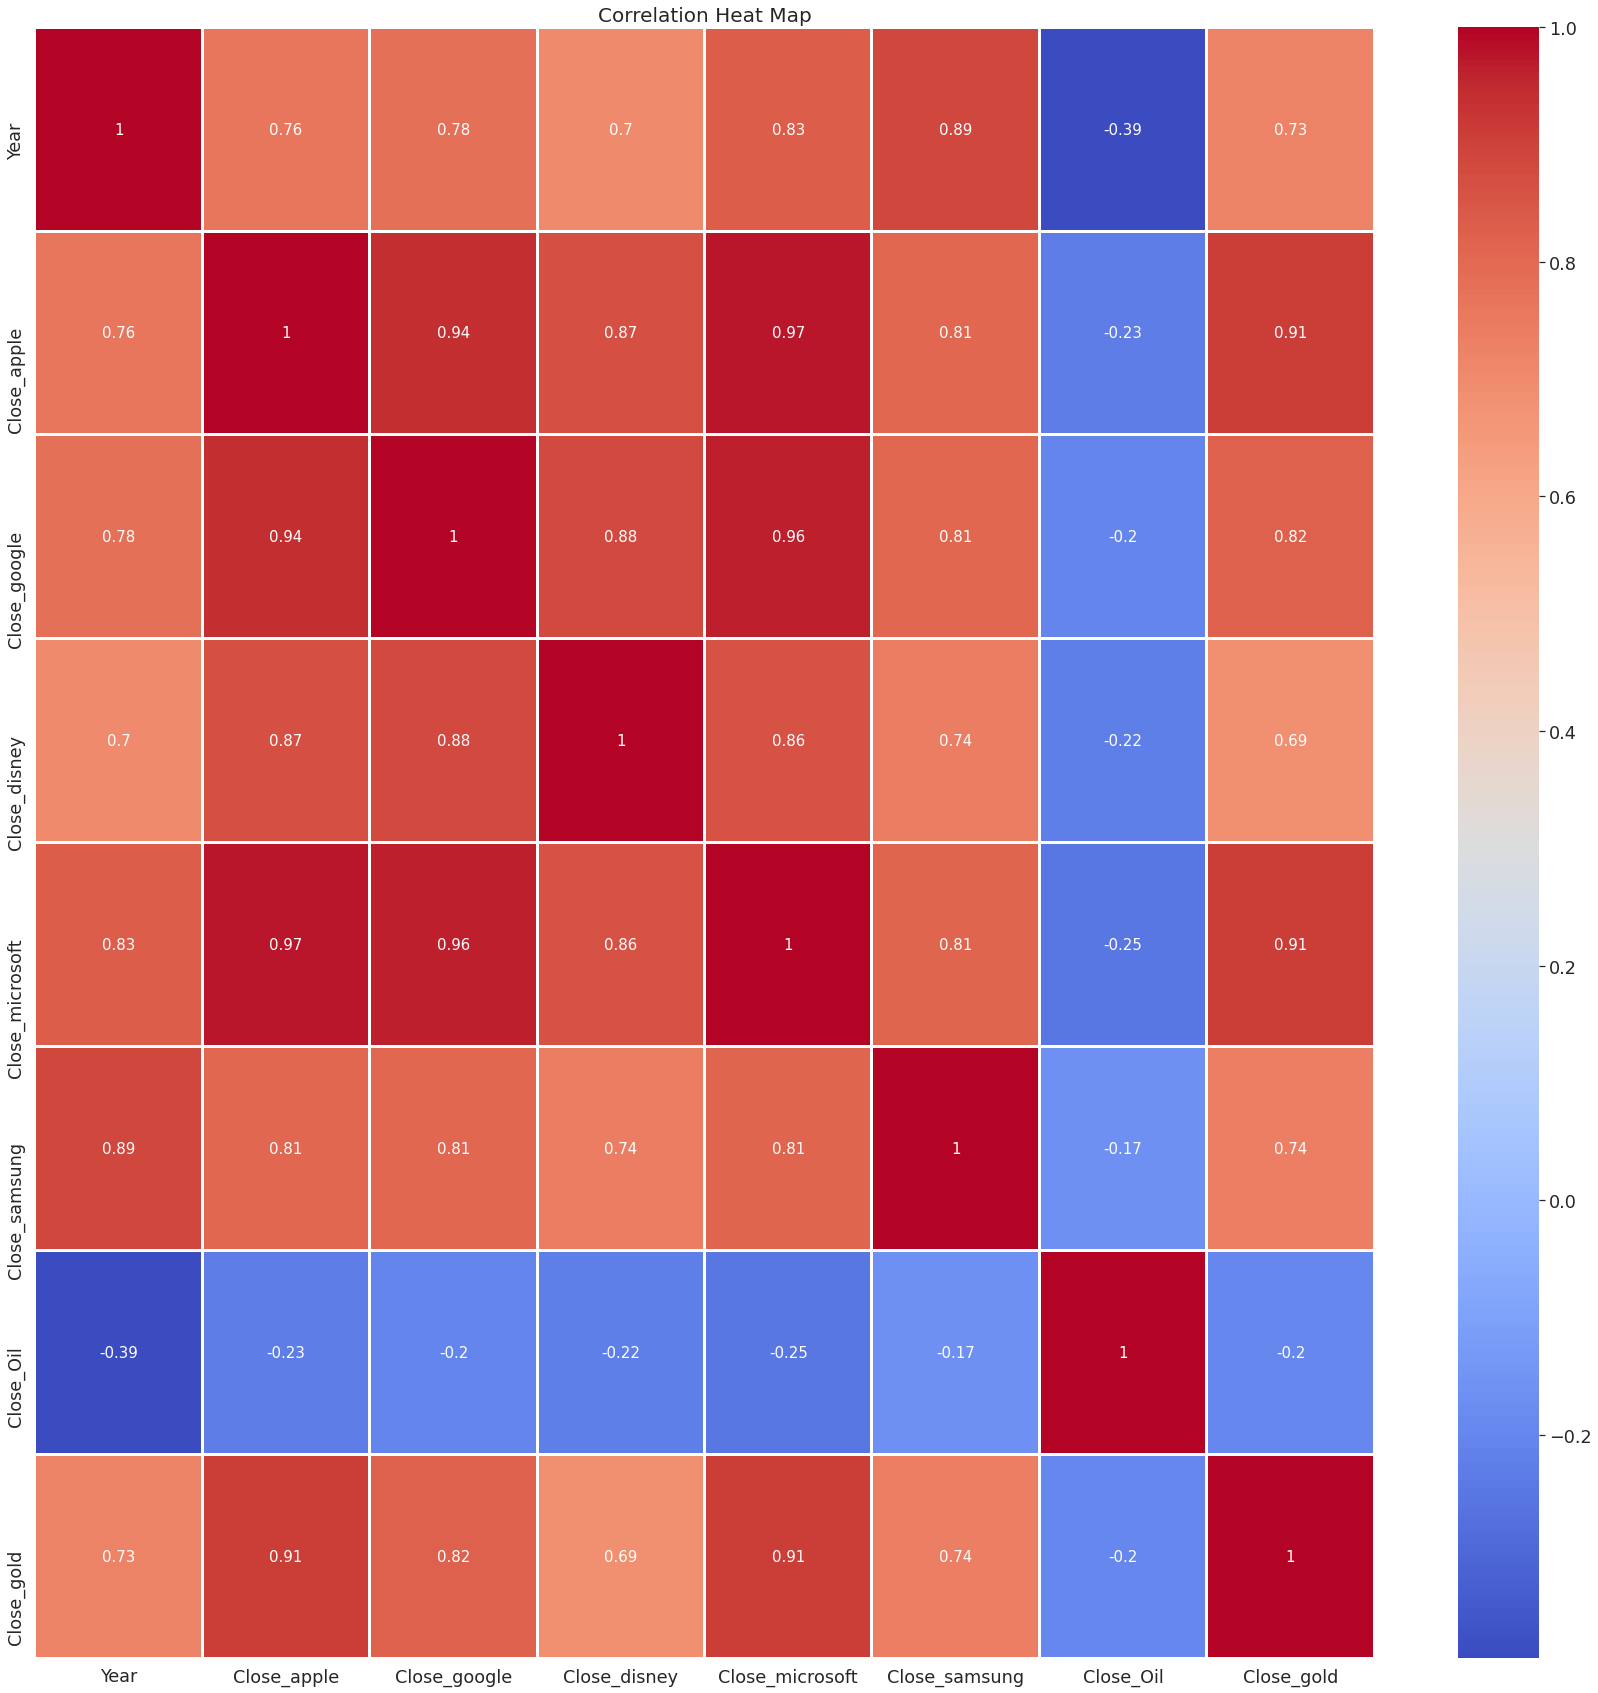

In [ ]:

sns.set(font_scale=1.6)
fig, ax = plt.subplots()
fig.set_size_inches(30, 30)
sns.heatmap(df_final.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2, annot_kws={"size": 15})
plt.title('Correlation Heat Map', fontsize = 20)
plt.show()

In [138]:
df_final.Close_apple.describe()

count    1939.000000
mean       52.332951
std        34.255363
min        17.849285
25%        28.092500
50%        39.884998
75%        57.421250
max       143.160004
Name: Close_apple, dtype: float64

In [155]:
df_final['rolling_mean'] = df_final['Close_apple'].rolling(12).mean()

In [161]:
df_final["rolling_mean"]=df_final.rolling_mean.bfill().ffill()

In [167]:
df_final["rolling_mean"].describe()

count    1939.000000
mean       52.008065
std        33.985031
min        18.344047
25%        27.925209
50%        39.767292
75%        56.320937
max       137.532501
Name: rolling_mean, dtype: float64

In [171]:
param1 = 56.33

In [175]:
df_final['Buy'] = df_final['Close_apple'].apply(lambda c: 0 if c > param1 else 1)



In [174]:
df_final

,Year,Date,Close_apple,Close_google,Close_disney,Close_microsoft,Close_samsung,Close_Oil,Close_gold,Buy,rolling_mean
0,2014,2014-01-02,19.754642,554.481689,76.269997,37.160000,26180.0,95.14,1225.000000,1,19.420833
1,2014,2014-01-03,19.320715,550.436829,76.110001,36.910000,25920.0,93.66,1238.400024,1,19.420833
2,2014,2014-01-06,19.426071,556.573853,75.820000,36.130001,26140.0,93.12,1237.800049,1,19.420833
3,2014,2014-01-07,19.287144,567.303589,76.339996,36.410000,26080.0,93.31,1229.400024,1,19.420833
4,2014,2014-01-08,19.409286,568.484192,75.220001,35.759998,25820.0,91.90,1225.300049,1,19.420833
...,...,...,...,...,...,...,...,...,...,...,...
1934,2020,2020-11-26,133.979996,2539.899902,178.350006,265.019989,68000.0,52.64,1776.599976,0,133.979996
1935,2021,2021-01-18,133.979996,2539.899902,178.350006,265.019989,85000.0,52.64,1776.599976,0,133.979996
1936,2021,2021-02-15,133.979996,2539.899902,178.350006,265.019989,84200.0,52.64,1776.599976,0,133.979996
1937,2021,2021-04-02,133.979996,2539.899902,178.350006,265.019989,84800.0,52.64,1776.599976,0,133.979996


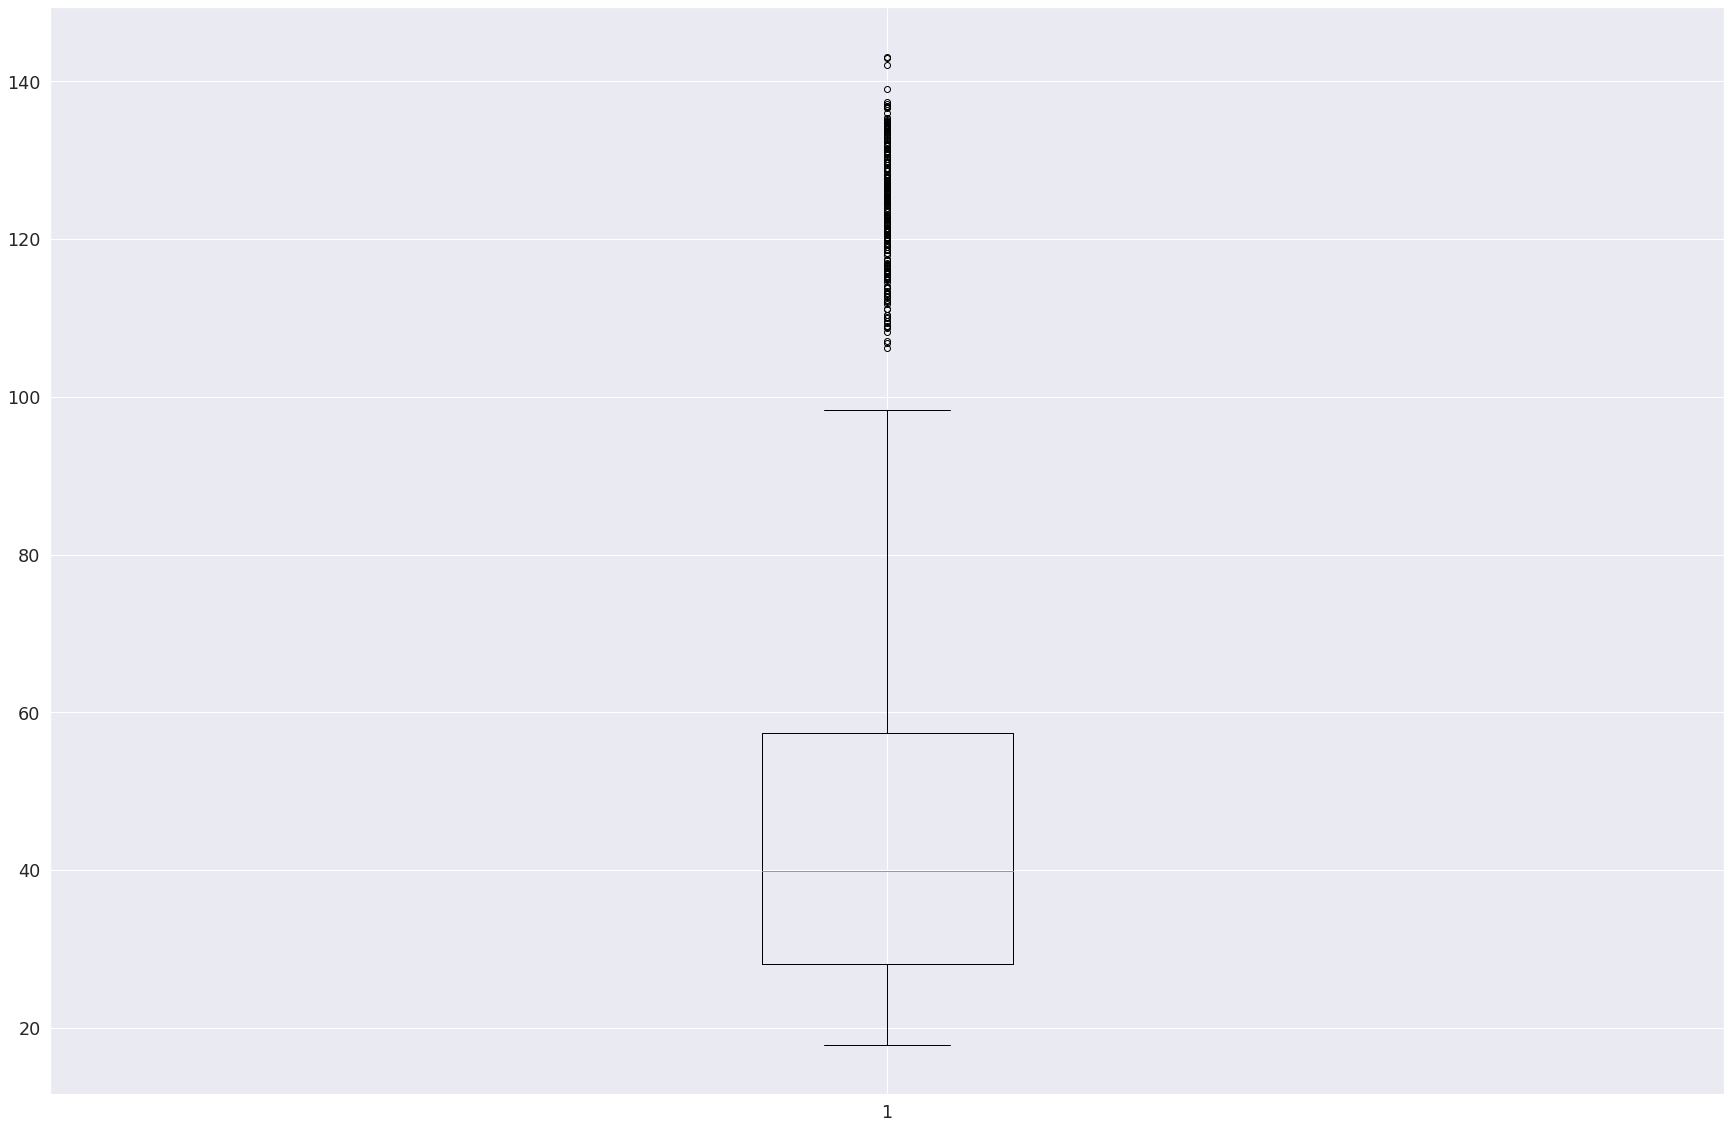

In [150]:

plt.boxplot(df_final['Close_apple'])

plt.show()

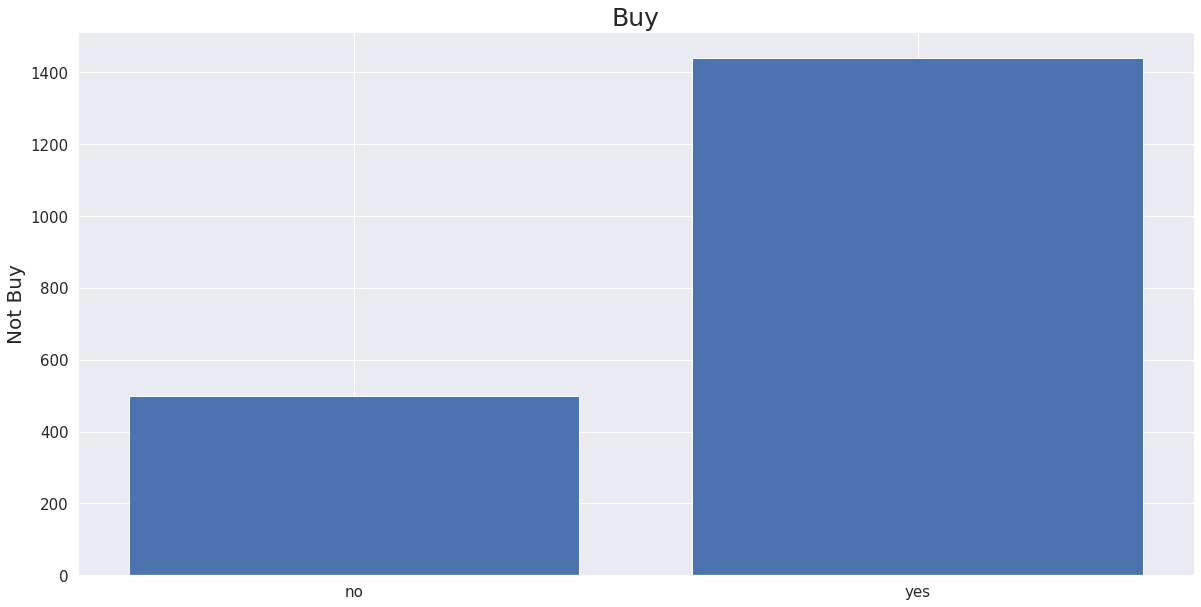

In [173]:
#7:  Barchartse
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 1)

# make the data read to feed into the visulizer
X_Canceled= df_final.replace({'Buy': {1: 'yes', 0: 'no'}}).groupby('Buy').size().reset_index(name='Counts')['Buy']
Y_Canceled = df_final.replace({'Buy': {1: 'yes', 0: 'no'}}).groupby('Buy').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes.bar(X_Canceled, Y_Canceled)
axes.set_title('Buy', fontsize=25)
axes.set_ylabel('Not Buy', fontsize=20)
axes.tick_params(axis='both', labelsize=15)



plt.show()

In [176]:
from sklearn.linear_model import LinearRegression

In [194]:
target = df_final["Buy"]

In [178]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [195]:
df_model = df_final.drop(columns = ["Date", "rolling_mean", "Close_apple"])

In [196]:
df_model

,Year,Close_google,Close_disney,Close_microsoft,Close_samsung,Close_Oil,Close_gold,Buy
0,2014,554.481689,76.269997,37.160000,26180.0,95.14,1225.000000,1
1,2014,550.436829,76.110001,36.910000,25920.0,93.66,1238.400024,1
2,2014,556.573853,75.820000,36.130001,26140.0,93.12,1237.800049,1
3,2014,567.303589,76.339996,36.410000,26080.0,93.31,1229.400024,1
4,2014,568.484192,75.220001,35.759998,25820.0,91.90,1225.300049,1
...,...,...,...,...,...,...,...,...
1934,2020,2539.899902,178.350006,265.019989,68000.0,52.64,1776.599976,0
1935,2021,2539.899902,178.350006,265.019989,85000.0,52.64,1776.599976,0
1936,2021,2539.899902,178.350006,265.019989,84200.0,52.64,1776.599976,0
1937,2021,2539.899902,178.350006,265.019989,84800.0,52.64,1776.599976,0


In [230]:
X_train, X_test, y_train, y_test = train_test_split(df_model.loc[:, df_model.columns != 'Buy'], target, test_size=0.5, random_state=22)

In [198]:
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [199]:

from sklearn.ensemble import RandomForestClassifier

In [233]:
random_f = RandomForestClassifier()
model = random_f.fit(X_train, y_train)

In [234]:
y_pred = model.predict(X_test)

In [235]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.013402061855670102
Mean Squared Error: 0.013402061855670102
Root Mean Squared Error: 0.11576727454540037


In [206]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [236]:

print("Accuracy for Random Forest Cassifier:",accuracy_score(y_test, y_pred))

Accuracy for Random Forest Cassifier: 0.98659793814433


In [216]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#!pip install yellowbrick
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

from sklearn.neighbors import KNeighborsClassifier

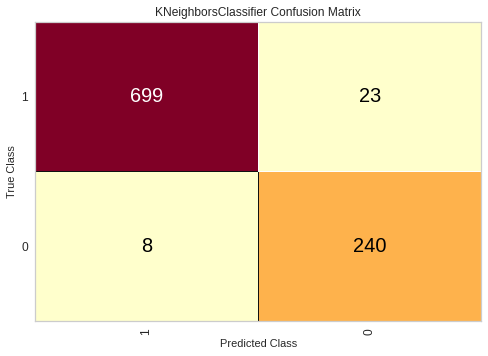

In [237]:
nearest_n = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)


#The ConfusionMatrix visualizer taxes a model
classes = [1,0]
cm = ConfusionMatrix(nearest_n, classes=classes, labels = [0,1], percent=False)


cm.score(X_test, y_test)

for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

In [238]:
y_pred = model.predict(X_test)

In [239]:
print("Accuracy for Kneughbors:",accuracy_score(y_test, y_pred))

Accuracy for Kneughbors: 0.98659793814433


In [240]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.013402061855670102
Mean Squared Error: 0.013402061855670102
Root Mean Squared Error: 0.11576727454540037


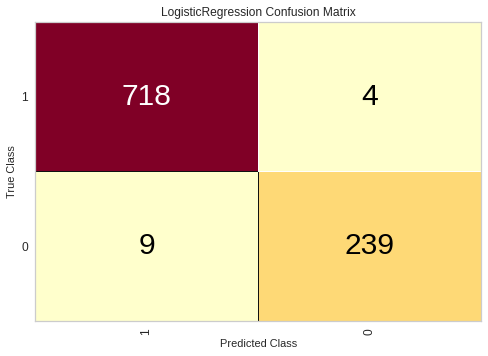

In [257]:
model = LogisticRegression()
classes = [1,0]
cm = ConfusionMatrix(model, classes=classes, percent=False, labels = [1, 0])

cm.fit(X_train, y_train)

cm.score(X_test, y_test)

for label in cm.ax.texts:
    label.set_size(30)

cm.poof()

In [243]:
y_pred = model.predict(X_test)

In [244]:
print("Accuracy for Logistic regression:",accuracy_score(y_test, y_pred))

Accuracy for Logistic regression: 0.98659793814433


In [245]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.013402061855670102
Mean Squared Error: 0.013402061855670102
Root Mean Squared Error: 0.11576727454540037


In [246]:
from sklearn.linear_model import LinearRegression

In [247]:
df_model_L = df_final.drop(columns = ["Date", "rolling_mean", "Buy"])

In [262]:
target = df_model_L["Close_apple"]

In [263]:
X_train, X_test, y_train, y_test = train_test_split(df_model_L.loc[:, df_model_L.columns != 'Close_apple'], target, test_size=0.5, random_state=22)

In [265]:
y_pred = model.predict(X_test)

In [269]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51.61295202680413
Mean Squared Error: 3868.817979241272
Root Mean Squared Error: 62.199822984002715
